<a href="https://colab.research.google.com/github/narennravi/Structured_Data-Assignment/blob/master/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Lib & modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing & Exporting data

In [3]:
data = pd.read_parquet('/content/train.parquet')

In [4]:
# Filter for "Target Drug" incidents only
data_target = data[data['Incident'] == 'TARGET DRUG']


In [5]:
# Extract the month from the date column
data_target['Month'] = pd.to_datetime(data_target['Date']).dt.to_period('M')
data_target['Month']


<ipython-input-5-14e9d6666b3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_target['Month'] = pd.to_datetime(data_target['Date']).dt.to_period('M')


3294791     2020-04
3296990     2018-06
3305387     2019-06
3309423     2019-11
3309494     2020-03
             ...   
29074998    2018-10
29075105    2019-07
29075494    2019-05
29080031    2018-06
29080178    2018-07
Name: Month, Length: 67218, dtype: period[M]

In [6]:
# Get the number of patients who started taking the drug each month
monthly_starts = data_target.groupby('Month')['Patient-Uid'].nunique()

# Get the number of patients who stopped taking the drug each month
monthly_stops = monthly_starts.diff().fillna(monthly_starts.iloc[0])

# Print the results
print("Number of patients who started taking the drug each month:\n", monthly_starts)
print("\nNumber of patients who stopped taking the drug each month:\n", monthly_stops)

Number of patients who started taking the drug each month:
 Month
2017-02       1
2017-03       2
2017-04       1
2017-05       5
2017-06      11
2017-07       6
2017-08      10
2017-09       6
2017-10       6
2017-11       6
2017-12      14
2018-01      15
2018-02      19
2018-03     472
2018-04     732
2018-05    1042
2018-06    1217
2018-07    1244
2018-08    1522
2018-09    1397
2018-10    1620
2018-11    1661
2018-12    1623
2019-01    1907
2019-02    1596
2019-03    1781
2019-04    1869
2019-05    2207
2019-06    2089
2019-07    2253
2019-08    2457
2019-09    2152
2019-10    2627
2019-11    2383
2019-12    2502
2020-01    2558
2020-02    2517
2020-03    2372
2020-04    2652
2020-05    2728
2020-06    2674
2020-07    2946
2020-08    2383
2020-09     384
Freq: M, Name: Patient-Uid, dtype: int64

Number of patients who stopped taking the drug each month:
 Month
2017-02       1.0
2017-03       1.0
2017-04      -1.0
2017-05       4.0
2017-06       6.0
2017-07      -5.0
2017-08       

In [7]:
dropoff_rate = monthly_stops/5

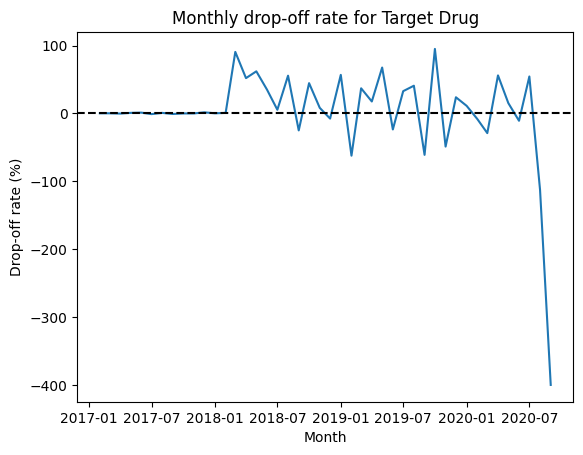

In [8]:
# convert Period data type to datetime data type
dropoff_rate.index = dropoff_rate.index.to_timestamp()

# plot the drop-off rate as a line graph
plt.plot(dropoff_rate)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Drop-off rate (%)')
plt.title('Monthly drop-off rate for Target Drug')
plt.show()